# Computer Assignment 7

## Deep Neural Networks

In [2]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import resource
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
import cvxpy
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool
from random import randint

###------------------- keras imports for the dataset and neural network --------------------##
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


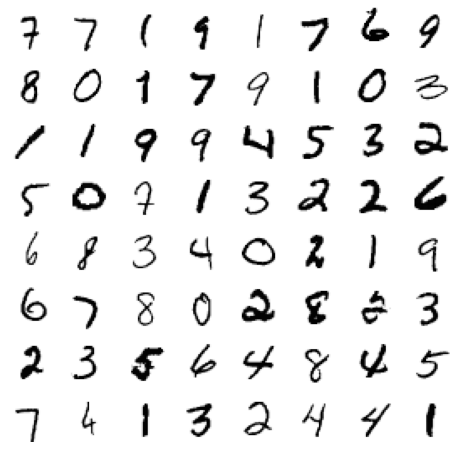

In [2]:

## Preprocessing of data
# Load data from keras:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Making a copy before flattening for the next code-segment which displays images
X_train_drawing = X_train


# Reshape data for building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


# Create validation dataset by splitting the test dataset to half
# Split train and test data here: (X_test, Y_test, X_val, Y_val)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

plt.rcParams['figure.figsize'] = (8,8)
# Show some random digits
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(X_train_drawing[randint(0, X_train.shape[0])], cmap='Greys')

## a) Batch Gradient Descent

In this part we investigate the batch gradient descent.

In [160]:
## -------------------Deep Nural Network (DNN) -------------------------------------------
#----- Part (a) --------------------------------------------------------------------------

# Building a linear stack of layers with the sequential model

model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))



In [75]:
##-------------------------- Compiling the sequential model ---------------------------------
LR=1
MOMENTUM=0.0
DECAY=0.99

sgd = optimizers.SGD(lr= LR , decay= DECAY , momentum= MOMENTUM) 
model.compile(loss='categorical_crossentropy',metrics=['mean_squared_error','accuracy'] ,optimizer= sgd)



##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

EPOCHS=100
VERBOS= 1

## Saving metrics in history

# Complete the history: 
history = model.fit(X_train, Y_train,
          epochs= EPOCHS,
          verbose= VERBOS ,
          validation_data=(X_val,Y_val))  
end = time.time()

# saving the model
save_dir = os.path.abspath(os.getcwd())
model_name = 'MY_MODEL'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

print(history.history.keys())



Train on 60000 samples, validate on 5000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 67us/step - loss: 1.3081 - mean_squared_error: 0.0593 - accuracy: 0.5864 - val_loss: 1.1335 - val_mean_squared_error: 0.0523 - val_accuracy: 0.6624
Epoch 2/100
60000/60000 [==============================] - 2s 41us/step - loss: 1.1229 - mean_squared_error: 0.0518 - accuracy: 0.6584 - val_loss: 1.0546 - val_mean_squared_error: 0.0488 - val_accuracy: 0.6834
Epoch 3/100
60000/60000 [==============================] - 2s 37us/step - loss: 1.0676 - mean_squared_error: 0.0493 - accuracy: 0.6730 - val_loss: 1.0137 - val_mean_squared_error: 0.0469 - val_accuracy: 0.6964
Epoch 4/100
60000/60000 [==============================] - 2s 41us/step - loss: 1.0346 - mean_squared_error: 0.0478 - accuracy: 0.6833 - val_loss: 0.9864 - val_mean_squared_error: 0.0456 - val_accuracy: 0.7028
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 1.0114 - mean_squared_error: 0.

Epoch 40/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.8486 - mean_squared_error: 0.0391 - accuracy: 0.7366 - val_loss: 0.8132 - val_mean_squared_error: 0.0374 - val_accuracy: 0.7558
Epoch 41/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.8470 - mean_squared_error: 0.0391 - accuracy: 0.7369 - val_loss: 0.8118 - val_mean_squared_error: 0.0373 - val_accuracy: 0.7560
Epoch 42/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.8456 - mean_squared_error: 0.0390 - accuracy: 0.7374 - val_loss: 0.8103 - val_mean_squared_error: 0.0372 - val_accuracy: 0.7564
Epoch 43/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.8441 - mean_squared_error: 0.0389 - accuracy: 0.7380 - val_loss: 0.8090 - val_mean_squared_error: 0.0372 - val_accuracy: 0.7574
Epoch 44/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.8427 - mean_squared_error: 0.0388 - accuracy: 0.7384 - val_loss: 0.8076 -

Epoch 79/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.8094 - mean_squared_error: 0.0373 - accuracy: 0.7486 - val_loss: 0.7753 - val_mean_squared_error: 0.0356 - val_accuracy: 0.7674
Epoch 80/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.8087 - mean_squared_error: 0.0373 - accuracy: 0.7488 - val_loss: 0.7747 - val_mean_squared_error: 0.0355 - val_accuracy: 0.7674
Epoch 81/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.8080 - mean_squared_error: 0.0372 - accuracy: 0.7491 - val_loss: 0.7740 - val_mean_squared_error: 0.0355 - val_accuracy: 0.7682
Epoch 82/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.8074 - mean_squared_error: 0.0372 - accuracy: 0.7495 - val_loss: 0.7734 - val_mean_squared_error: 0.0355 - val_accuracy: 0.7680
Epoch 83/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.8067 - mean_squared_error: 0.0372 - accuracy: 0.7495 - val_loss: 0.7728 -

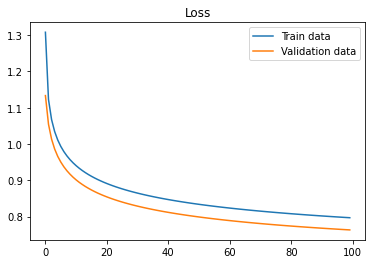

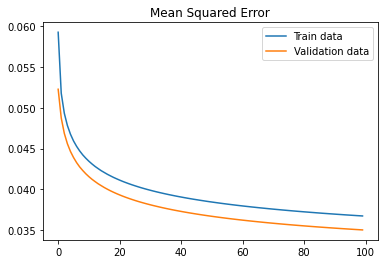

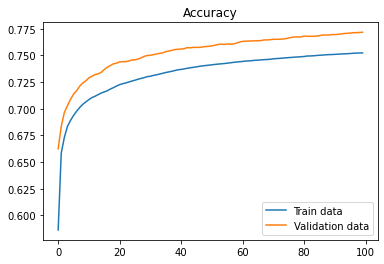

['loss', 'mean_squared_error', 'accuracy']
5000/5000 [==============================] - 0s 52us/step
Test Loss 0.7702127061843872
Test MSE 0.03546147421002388
Test Accuracy 0.7706000208854675


In [79]:

# plotting the metrics

# ----------------------- Plot your result here ---------------------
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train data','Validation data'])
plt.title('Loss')
plt.show()

fig = plt.figure()
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Train data','Validation data'])
plt.title('Mean Squared Error')
plt.show()


fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train data','Validation data'])
plt.title('Accuracy')
plt.show()


#--------------------------------------------------------------------


print(model.metrics_names)
## Evaluate the model

mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=1)


print("Test Loss", loss_and_metrics[0])
print("Test MSE", loss_and_metrics[1])
print("Test Accuracy", loss_and_metrics[2])


7712  classified correctly
2288  classified incorrectly


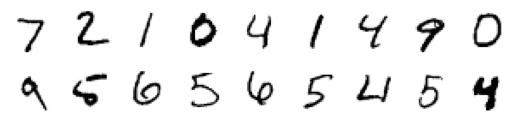

In [124]:
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()
X_test_drawing=X_test2
# Reshape data for building the input vector from the 28x28 pixels
X_test2 = X_test2.reshape(10000, 784)
X_test2 = X_test2.astype('float32')

# normalizing the data to help with the training
X_test2 /= 255




# ------------------------- Load the model and create predictions on the test set --------------------
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test2)




## --------- See which we predicted correctly and which not-----------

correct_indices = np.where(predicted_classes-y_test2==0)[0]
incorrect_indices = np.where(predicted_classes-y_test2!=0)[0]


print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (9,2)


figure_evaluation = plt.figure()
####----------------------------------------- Plot the results----------------
# plot 9 correct predictions
for i in range(9):
    ax = plt.subplot(2, 9, i+1)
    ax.axis('off')
    plt.imshow(X_test_drawing[correct_indices[i]], cmap='Greys')

# plot 9 incorrect predictions
for i in range(9):
    ax = plt.subplot(2, 9, i+10)
    ax.axis('off')
    plt.imshow(X_test_drawing[incorrect_indices[i]], cmap='Greys')


## b) Mini-Batch Gradient Decsent

In this section we investigate the mini-batch gradient decsent with batch size $10,1000,1000$ with same number of epochs (EPOCH=$100$). We verify several learning rates LR$=0.1,1,10$.

In [170]:
##------------------------- Part (b) -----------------------------------


##-------------------------- Compiling the sequential model ---------------------------------
MOMENTUM=0.0
DECAY=0.99
Test_loss=[]
Test_mse=[]
Test_acc=[]
TIMES=[]

for LR in [0.1,1,10]:
    for B_SIZE in [10,100,1000]:
        print(LR,B_SIZE)
        # Building a linear stack of layers with the sequential model

        model = Sequential()
        model.add(Dense(10, input_shape=(784,)))
        model.add(Activation('relu'))                            

        model.add(Dense(10))
        model.add(Activation('relu'))

        model.add(Dense(10))
        model.add(Activation('softmax'))
        
        sgd = optimizers.SGD(lr= LR , decay= DECAY , momentum= MOMENTUM) 
        model.compile(loss='categorical_crossentropy',metrics=['mean_squared_error','accuracy'] ,optimizer= sgd)



        ##-------------------------- Training and saving the model ----------------------------------------------
        start = time.time()

        EPOCHS=100
        VERBOS= 0

        ## Saving metrics in history

        # Complete the history: 
        history = model.fit(X_train, Y_train,
                  epochs= EPOCHS,
                  verbose= VERBOS,
                  batch_size= B_SIZE,        
                  validation_data=(X_val,Y_val))  
        end = time.time()
        loss_and_metrics = model.evaluate(X_test, Y_test, verbose=1)

        print("duration= ",end-start)
        print("Test Loss", loss_and_metrics[0])
        print("Test MSE", loss_and_metrics[1])
        print("Test Accuracy", loss_and_metrics[2])
        print('----------------')
        
        Test_loss.append(loss_and_metrics[0])
        Test_mse.append(loss_and_metrics[1])
        Test_acc.append(loss_and_metrics[2])
        TIMES.append(end-start)


0.1 10
5000/5000 [==============================] - 0s 26us/step
duration=  695.8856680393219
Test Loss 1.9900693435668946
Test MSE 0.08105741441249847
Test Accuracy 0.38960000872612
----------------
0.1 100
5000/5000 [==============================] - 0s 26us/step
duration=  108.29652690887451
Test Loss 2.219158135604858
Test MSE 0.0883600264787674
Test Accuracy 0.1940000057220459
----------------
0.1 1000
5000/5000 [==============================] - 0s 25us/step
duration=  40.36449885368347
Test Loss 2.188929546737671
Test MSE 0.08705571293830872
Test Accuracy 0.20360000431537628
----------------
1 10
5000/5000 [==============================] - 0s 27us/step
duration=  576.731427192688
Test Loss 1.0697283172607421
Test MSE 0.05099809169769287
Test Accuracy 0.640999972820282
----------------
1 100
5000/5000 [==============================] - 0s 28us/step
duration=  119.50752711296082
Test Loss 1.003762516593933
Test MSE 0.04614018276333809
Test Accuracy 0.6833999752998352
------------

### Comparison results


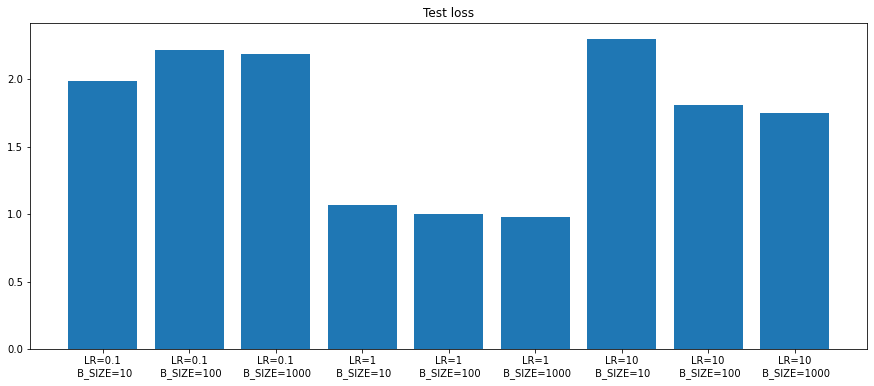

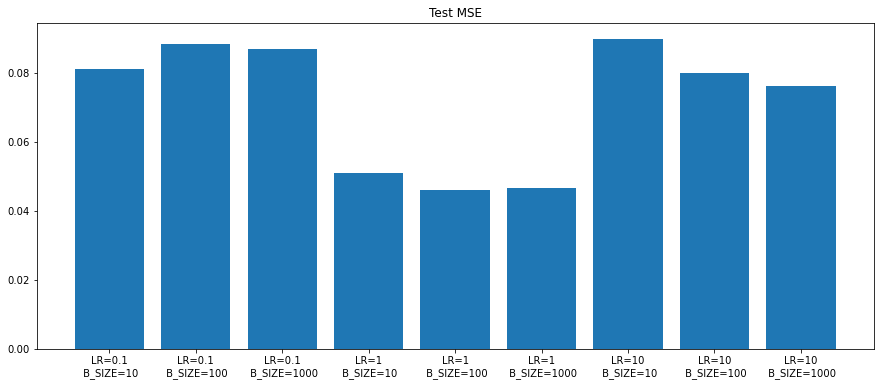

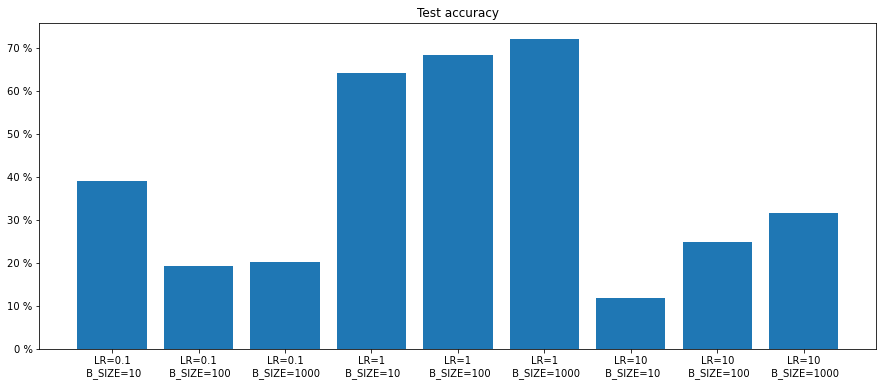

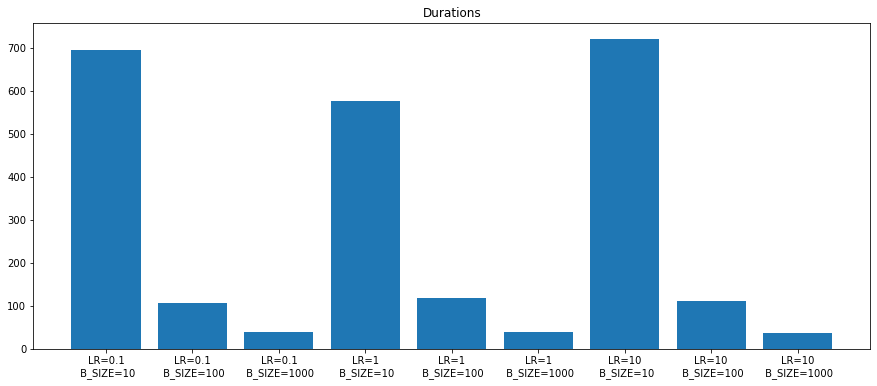

In [173]:
from matplotlib.ticker import FuncFormatter

x = np.arange(9)

plt.rcParams['figure.figsize'] = (15,6)

fig, ax = plt.subplots()
plt.bar(x, Test_loss)
plt.xticks(x, ('LR=0.1\n B_SIZE=10', 'LR=0.1\n B_SIZE=100', 'LR=0.1\n B_SIZE=1000',
               'LR=1\n B_SIZE=10', 'LR=1\n B_SIZE=100', 'LR=1\n B_SIZE=1000',
               'LR=10\n B_SIZE=10', 'LR=10\n B_SIZE=100', 'LR=10\n B_SIZE=1000'))
plt.title('Test loss')
plt.show()


fig, ax = plt.subplots()
plt.bar(x, Test_mse)
plt.xticks(x, ('LR=0.1\n B_SIZE=10', 'LR=0.1\n B_SIZE=100', 'LR=0.1\n B_SIZE=1000',
               'LR=1\n B_SIZE=10', 'LR=1\n B_SIZE=100', 'LR=1\n B_SIZE=1000',
               'LR=10\n B_SIZE=10', 'LR=10\n B_SIZE=100', 'LR=10\n B_SIZE=1000'))
plt.title('Test MSE')
plt.show()


def percents(x, pos):
    'The two args are the value and tick position'
    return '%1.f %%' % (x * 1e2)
formatter = FuncFormatter(percents)
fig, ax = plt.subplots()
plt.bar(x, Test_acc)
ax.yaxis.set_major_formatter(formatter)
plt.xticks(x, ('LR=0.1\n B_SIZE=10', 'LR=0.1\n B_SIZE=100', 'LR=0.1\n B_SIZE=1000',
               'LR=1\n B_SIZE=10', 'LR=1\n B_SIZE=100', 'LR=1\n B_SIZE=1000',
               'LR=10\n B_SIZE=10', 'LR=10\n B_SIZE=100', 'LR=10\n B_SIZE=1000'))
plt.title('Test accuracy')
plt.show()


fig, ax = plt.subplots()
plt.bar(x, TIMES)
plt.xticks(x, ('LR=0.1\n B_SIZE=10', 'LR=0.1\n B_SIZE=100', 'LR=0.1\n B_SIZE=1000',
               'LR=1\n B_SIZE=10', 'LR=1\n B_SIZE=100', 'LR=1\n B_SIZE=1000',
               'LR=10\n B_SIZE=10', 'LR=10\n B_SIZE=100', 'LR=10\n B_SIZE=1000'))
plt.title('Durations')
plt.show()

It can be observed that LR=$1$ performs better while the batch size of 1000 yields better performance both in terms of accuracy and speed. However, the accuracy is not as good as batch gradient descent in part (a).

## c) Shallow vs. deep networks

In [79]:
##------------------------- Part (c) ------------------------------------
# Repeat part (a) by fixing \sum_j N_j and discuss the results


##-------------------------- Compiling the sequential model ---------------------------------
##--------------------------               Shallow          ---------------------------------

#\sum_j N_j=30

model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr= LR , decay= DECAY , momentum= MOMENTUM) 
model.compile(loss='categorical_crossentropy',metrics=['mean_squared_error','accuracy'] ,optimizer= sgd)


LR=0.9
MOMENTUM=0.0
B_SIZE=10
DECAY=0.99

sgd = optimizers.SGD(lr= LR , decay= DECAY , momentum= MOMENTUM) 
model.compile(loss='categorical_crossentropy',metrics=['mean_squared_error','accuracy'] ,optimizer= sgd)



##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

EPOCHS=20
VERBOS= 1

## Saving metrics in history

# Complete the history: 
history_shallow = model.fit(X_train, Y_train,
          epochs= EPOCHS,
          verbose= VERBOS ,
          batch_size=B_SIZE,                  
          validation_data=(X_val,Y_val))  
end = time.time()

# saving the model
save_dir = os.path.abspath(os.getcwd())
model_name = 'Shallow_MODEL'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)




Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.7947 - mean_squared_error: 0.0355 - accuracy: 0.8062 - val_loss: 0.6781 - val_mean_squared_error: 0.0300 - val_accuracy: 0.8384
Epoch 2/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.6808 - mean_squared_error: 0.0303 - accuracy: 0.8335 - val_loss: 0.6387 - val_mean_squared_error: 0.0281 - val_accuracy: 0.8486
Epoch 3/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.6528 - mean_squared_error: 0.0290 - accuracy: 0.8393 - val_loss: 0.6185 - val_mean_squared_error: 0.0272 - val_accuracy: 0.8516
Epoch 4/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.6364 - mean_squared_error: 0.0282 - accuracy: 0.8426 - val_loss: 0.6053 - val_mean_squared_error: 0.0266 - val_accuracy: 0.8542
Epoch 5/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.6251 - mean_squared_erro

In [81]:
##-------------------------- Compiling the sequential model ---------------------------------
##--------------------------               Deep          ---------------------------------

model = Sequential()
model.add(Dense(64, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

LR=1.1


MOMENTUM=0.0
DECAY=0.99
B_SIZE=10

optim = optimizers.SGD(lr= LR , decay= DECAY , momentum= MOMENTUM) 
#optim = optimizers.Adam(lr= LR, decay= DECAY) 
model.compile(loss='categorical_crossentropy',metrics=['mean_squared_error','accuracy'] ,optimizer= optim)



##-------------------------- Training and saving the model ----------------------------------------------
start = time.time()

EPOCHS=20
VERBOS= 1

## Saving metrics in history

# Complete the history: 
history_deep = model.fit(X_train, Y_train,
          epochs= EPOCHS,
          verbose= VERBOS ,
          batch_size=B_SIZE,
          validation_data=(X_val,Y_val))  
end = time.time()

    

# saving the model
save_dir = os.path.abspath(os.getcwd())
model_name = 'Deep_MODEL'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 249us/step - loss: 1.2278 - mean_squared_error: 0.0557 - accuracy: 0.6227 - val_loss: 0.9788 - val_mean_squared_error: 0.0456 - val_accuracy: 0.7298
Epoch 2/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.9278 - mean_squared_error: 0.0430 - accuracy: 0.7467 - val_loss: 0.8230 - val_mean_squared_error: 0.0384 - val_accuracy: 0.7808
Epoch 3/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.8171 - mean_squared_error: 0.0378 - accuracy: 0.7787 - val_loss: 0.7423 - val_mean_squared_error: 0.0345 - val_accuracy: 0.7964
Epoch 4/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.7542 - mean_squared_error: 0.0347 - accuracy: 0.7922 - val_loss: 0.6926 - val_mean_squared_error: 0.0319 - val_accuracy: 0.8062
Epoch 5/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.7142 - mean_squared_erro

### Metrics

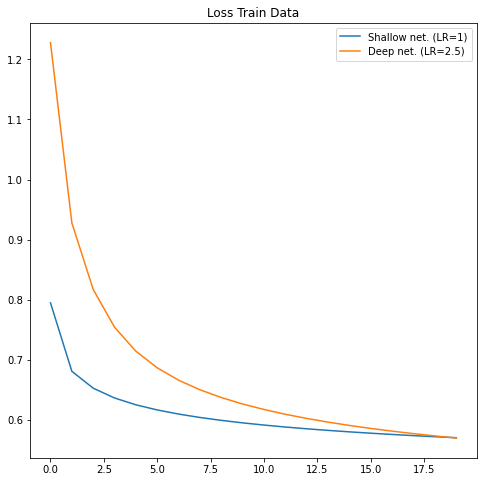

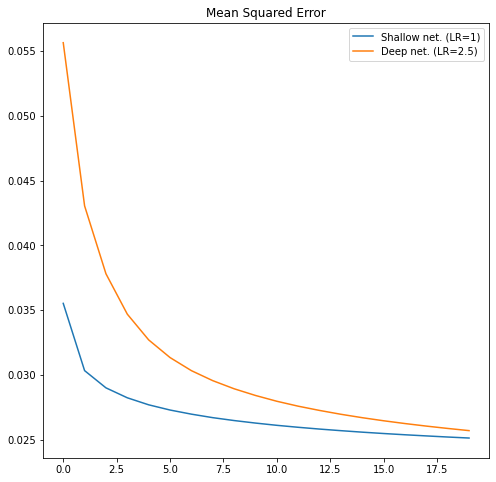

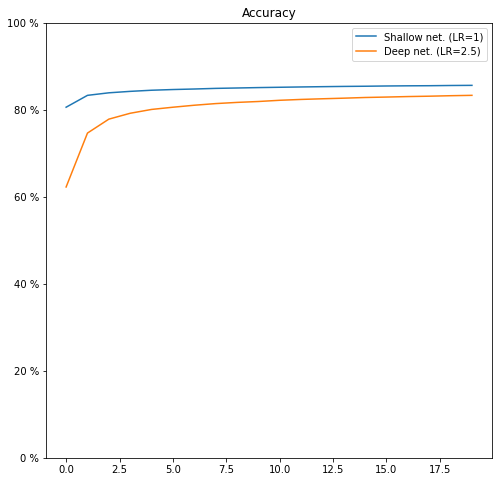

5000/5000 [==============================] - 0s 53us/step
Shallow network:
Test Loss 0.5556739606857299
Test MSE 0.024302534759044647
Test Accuracy 0.8651999831199646
----------------------
5000/5000 [==============================] - 0s 54us/step
Deep network:
Test Loss 0.5644402605056763
Test MSE 0.025397738441824913
Test Accuracy 0.8389999866485596


In [82]:
from matplotlib.ticker import FuncFormatter
plt.rcParams['figure.figsize'] = (8,8)

# plotting the metrics

# ----------------------- Plot your result here ---------------------
fig = plt.figure()
plt.plot(history_shallow.history['loss'])
plt.plot(history_deep.history['loss'])
plt.legend(['Shallow net. (LR=1)','Deep net. (LR=2.5)'])
plt.title('Loss Train Data')
plt.show()

fig = plt.figure()
plt.plot(history_shallow.history['mean_squared_error'])
plt.plot(history_deep.history['mean_squared_error'])
plt.legend(['Shallow net. (LR=1)','Deep net. (LR=2.5)'])
plt.title('Mean Squared Error')
plt.show()


def percents(x, pos):
    'The two args are the value and tick position'
    return '%1.f %%' % (x * 1e2)
formatter = FuncFormatter(percents)
fig,ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.plot(history_shallow.history['accuracy'])
plt.plot(history_deep.history['accuracy'])
plt.ylim([0,1])
plt.legend(['Shallow net. (LR=1)','Deep net. (LR=2.5)'])
plt.title('Accuracy')
plt.show()


mnist_model_shallow = load_model(os.path.join(save_dir, 'Shallow_MODEL'))
loss_and_metrics = mnist_model_shallow.evaluate(X_test, Y_test, verbose=1)

print('Shallow network:')
print("Test Loss", loss_and_metrics[0])
print("Test MSE", loss_and_metrics[1])
print("Test Accuracy", loss_and_metrics[2])

print('----------------------')

mnist_model_deep = load_model(os.path.join(save_dir, 'deep_MODEL'))
loss_and_metrics = mnist_model_deep.evaluate(X_test, Y_test, verbose=1)

print('Deep network:')
print("Test Loss", loss_and_metrics[0])
print("Test MSE", loss_and_metrics[1])
print("Test Accuracy", loss_and_metrics[2])


## d) Master-worker

We use a star master-worker topology meaning the master is training a neural network and each worker has access to its own private dataset. At each iteration, every worker computes the gradients and master collects all of the gradients and take an average over them.

In [5]:
## ----------------------- Part (d) -------------------------------------

# Split the dataset to 6 random disjoint subsets, each for one worker, and repeat part (a) on master-worker computational graph.

## Prepare the data here:
# Load data from keras:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Making a copy before flattening for the next code-segment which displays images
X_train_drawing = X_train


# Reshape data for building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


# Create validation dataset by splitting the test dataset to half
# Split train and test data here: (X_test, Y_test, X_val, Y_val)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

X_train_worker=[]
Y_train_worker=[]
for i in range(6):
    X_train_worker.append(X_train[i*10000:(i+1)*10000,])
    Y_train_worker.append(Y_train[i*10000:(i+1)*10000,])


## Compute the weights and DNN layers here:


## Complile the sequential model here:


## Plotting the metrics here:




(60000, 10)


In [ ]:
##--------------------------- Part (e) ---------------------------------

# Building a linear stack of layers with the sequential model here:
## You can use this command: model.add(Dropout(...))


# compiling the sequential model
sgd = optimizers.SGD(lr= ... , decay=..., momentum=..., nesterov=...) # complete the command
model.compile(loss='categorical_crossentropy', metrics=['...'], optimizer=sgd) # complete the command

# Training the model and saving metrics in history here:

# saving the model


# Plot the results here: 






In [ ]:
##--------------------------- Part (f) ---------------------------------

# Building a linear stack of layers with the sequential model here:
## You can use this command: model.add(BatchNormalization())


# compiling the sequential model
sgd = optimizers.SGD(lr= ... , decay=..., momentum=..., nesterov=...) # complete the command
model.compile(loss='categorical_crossentropy', metrics=['...'], optimizer=sgd) # complete the command

# Training the model and saving metrics in history here:


# saving the model:


# Plot the results here: 

